

$\newline$
$\newline$
$\newline$
$\newline$


$${\Large{\bf{\color{blue}{\text{CPMs: }}{\color{black}{\text{Continuous-Phase Modulations}}}}}}$$


$\newline$
$\newline$
$\newline$
$\newline$



$\newline$
$\newline$

#### $\color{blue}{\text{Necessary Functions:}}$

$\newline$
$\newline$

In [1]:
import os
import numpy as np
from termcolor import colored
from scipy.special import erfc
import matplotlib.pyplot as plt

In [2]:
def Seq_to_Str(array: np.array) -> str:

    out_str = ''
    array_flat = array.flatten()
    for i in array_flat:
        out_str += str(i)

    return out_str

In [3]:
def an_Seq(k: int, num_messages: int) -> np.array: # an is information sequence

    np.random.seed(0)
    out_seq = np.random.randint(low=0, high=2, size=(1, num_messages*k), dtype=int)

    return out_seq

In [4]:
def In_LOOKUP_TABLE(k: int) -> dict:

    In_dict = {}
    M = 2**k
    
    In_list = []
    for m in range(int(M/2)):

        In = 2*m + 1
        In_list.append(In)
        In_list.append(-In)

    In_list = sorted(In_list)

    for i, In in enumerate(In_list):

        key = bin(i)[2:].zfill(k)
        In_dict[key] = In
        
    
    return In_dict

In [5]:
def In_Seq(an_seq: np.array, k: int) -> np.array:

    In_list = []
    In_LOOKUP_TABLE_dict = In_LOOKUP_TABLE(k=k)
    an_seq = an_seq.flatten()
    n = int(len(an_seq) / k) # n = No. Samples
    for i in range(n):

        sample = an_seq[i*k: (i + 1)*k]
        sample_str = Seq_to_Str(sample)
        In_sample = In_LOOKUP_TABLE_dict[sample_str]
        In_list.append(In_sample)

    In_array = np.array(In_list, dtype=int)
    In_array = np.reshape(In_list, newshape=(1, -1))

    return In_array

$\newline$
$\newline$

<center>$\color{black}{Q(t)\;=\; \int_{t}^{\infty} \mathcal{N}(0, \; 1)\;dt}$</center>

$\newline$
$\newline$

In [6]:
def Q(x: np.array) -> np.array:

    return 0.5 * erfc(x / np.sqrt(2))

$\newline$
$\newline$

- $\color{black}{LREC:}$

<center>$\color{}{g(t) \; = \; \left \{ \begin{array}{ll}  \frac{1}{2LT} & 0 \leq t \leq LT \\ 0 & oth \end{array} \right.}$</center>

- $\color{black}{LRC:}$


<center>$\color{}{g(t) \; = \; \left \{ \begin{array}{ll}  \frac{1}{2LT} (1 - \cos(\frac{2 \pi t}{LT}))& 0 \leq t \leq LT \\ 0 & oth \end{array} \right.}$</center>


- $\color{black}{GMSK:}$


<center>$\color{black}{g(t) \; = \; \frac{Q(2 \pi B (t - \frac{T}{2})) \; - \; Q(2 \pi B (t + \frac{T}{2}))}{\sqrt{\ln2}}}$</center>


$\newline$
$\newline$

In [7]:
def g_Generator(t, L, T, mode='LREC'):
    

    if mode == 'LREC':
        
        g_t = np.zeros_like(t)
        g_t[(0 <= t) & (t <= L*T)] = 1 / (2*L*T)

    elif mode == 'LRC':
        
        g_t = (1 / (2*L*T)) * (1 - (np.cos((2*np.pi*t) / (L*T))))
        g_t[(0 > t) | (t > L*T)] = 0

    elif mode == 'GMSK':
        
        BT = 0.3
        B = BT / T
        g_t = (Q(2 * np.pi * B * (t - (T/2))) - Q(2 * np.pi * B * (t + (T/2)))) / (np.sqrt(np.log(2)))

    else:
        raise ValueError("Invalid modulation scheme. Use one of ['LREC', 'LRC', 'GMSK']")

    return g_t

In [8]:
L = 1
T = 1
T = float(T)
g_modes_list = ['LREC', 'LRC', 'GMSK']
t_array = np.linspace(-4*L*T, 4*L*T, 1000)


g_mode_LREC = g_modes_list[0]
g_t_LREC = g_Generator(t=t_array, L=L, T=T, mode=g_mode_LREC)

g_mode_LRC = g_modes_list[1]
g_t_LRC = g_Generator(t=t_array, L=L, T=T, mode=g_mode_LRC)


g_mode_GMSK = g_modes_list[2]
g_t_GMSK = g_Generator(t=t_array, L=L, T=T, mode=g_mode_GMSK)


Different Pulse Shapes (g(t)):
when, 


L (No. Symbols) = 1

T (Symbol Period) = 1.0



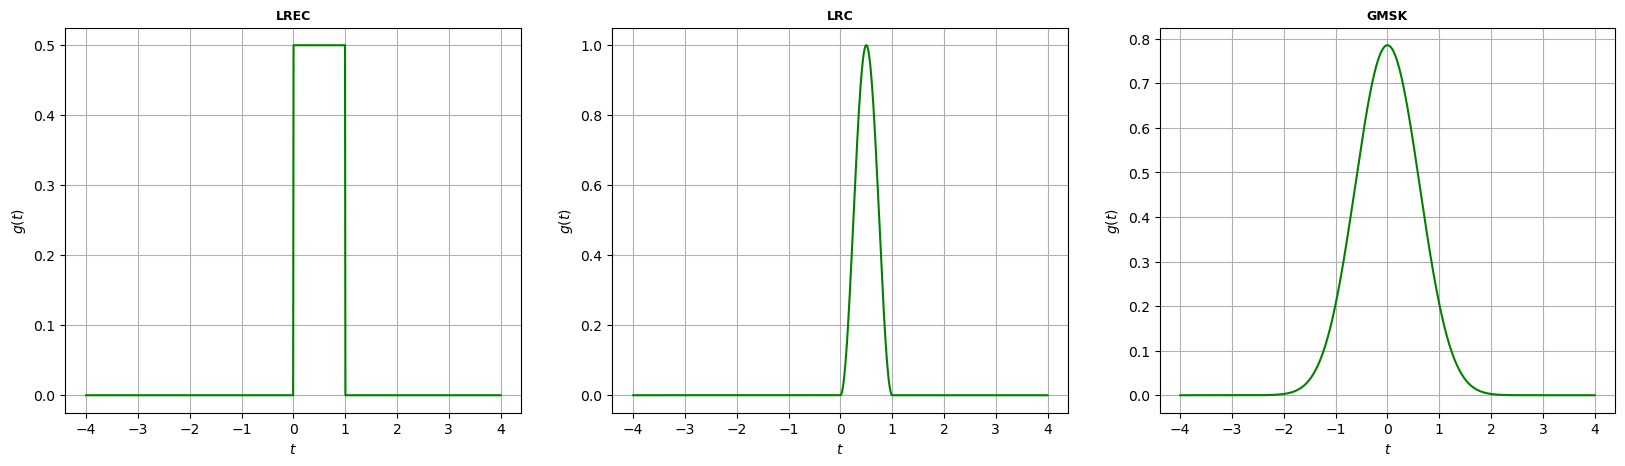

In [9]:
print(f'\n{colored(f"Different Pulse Shapes (g(t)):", "blue", attrs=["bold"])}\n{colored(f"when, ", "blue", attrs=["bold"])}\n')
print(f'\n{colored(f"L (No. Symbols) = {L}", "black", attrs=["bold"])}\n')
print(f'{colored(f"T (Symbol Period) = {T}", "black", attrs=["bold"])}\n')


plt.figure(figsize=(20, 5))
color = 'green'

plt.subplot(1, 3, 1)
plt.plot(t_array, g_t_LREC, color=color), plt.xlabel('$t$'), plt.ylabel('$g(t)$'), plt.title(f'{g_mode_LREC}', fontsize=9, fontweight='bold')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(t_array, g_t_LRC, color=color), plt.xlabel('$t$'), plt.ylabel('$g(t)$'), plt.title(f'{g_mode_LRC}', fontsize=9, fontweight='bold')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(t_array, g_t_GMSK, color=color), plt.xlabel('$t$'), plt.ylabel('$g(t)$'), plt.title(f'{g_mode_GMSK}', fontsize=9, fontweight='bold')
plt.grid(True)

plt.show()

$\newline$
$\newline$


<center>$\color{black}{q(t) \; = \;  \int_{-\infty}^{t}g(t) \; dt }$</center>


$\newline$
$\newline$

In [10]:
def q_Generator(t2_array: float, L, T, mode='LREC', dt: float=0.001) -> np.array:

    t1 = -20 * L * T
    q_t_list = []
    for t2 in t2_array:
        
        if t2 <= t1:
            q_t = 0
            
        else:
            t_array = np.arange(t1, t2, dt)
            g_t = g_Generator(t_array, L, T, mode)
            q_t = dt * g_t.sum()
            
        q_t_list.append(q_t)
    q_t_array = np.array(q_t_list, dtype=float)
    
    return q_t_array

In [11]:
L = 1
T = 1
T = float(T)
g_modes_list = ['LREC', 'LRC', 'GMSK']
t_array = np.linspace(-4*L*T, 4*L*T, 1000)


g_mode_LREC = g_modes_list[0]
q_t_LREC = q_Generator(t2_array=t_array, L=L, T=T, mode=g_mode_LREC)

g_mode_LRC = g_modes_list[1]
q_t_LRC = q_Generator(t2_array=t_array, L=L, T=T, mode=g_mode_LRC)


g_mode_GMSK = g_modes_list[2]
q_t_GMSK = q_Generator(t2_array=t_array, L=L, T=T, mode=g_mode_GMSK)


Different q(t):
when, 


L (No. Symbols) = 1

T (Symbol Period) = 1.0



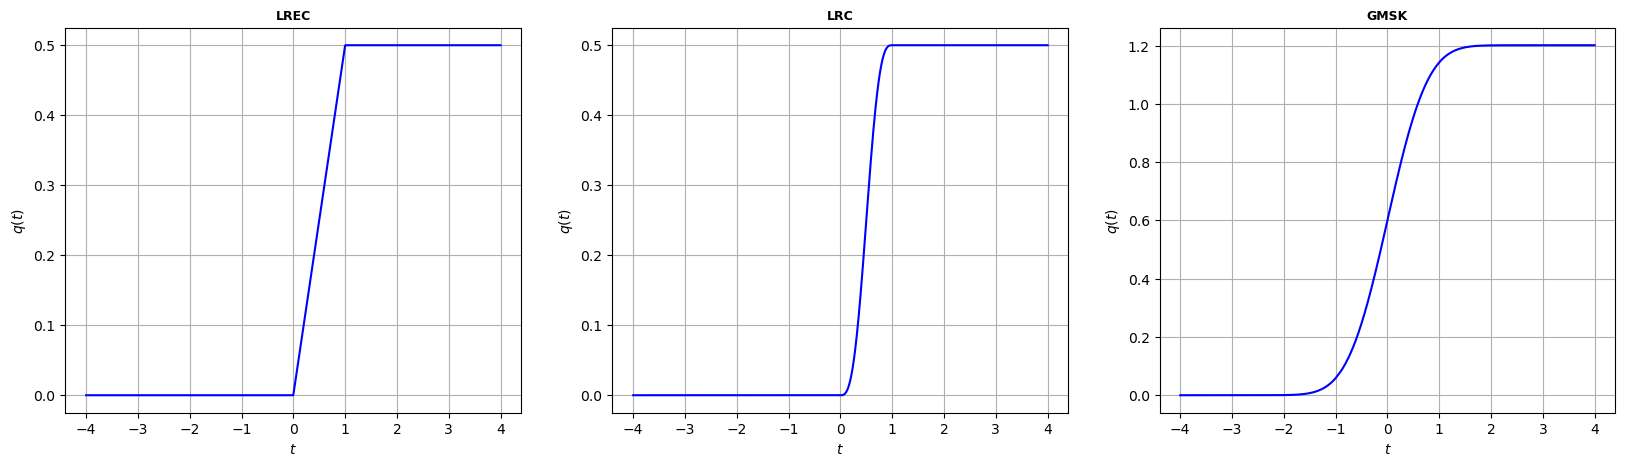

In [12]:
print(f'\n{colored(f"Different q(t):", "blue", attrs=["bold"])}\n{colored(f"when, ", "blue", attrs=["bold"])}\n')
print(f'\n{colored(f"L (No. Symbols) = {L}", "black", attrs=["bold"])}\n')
print(f'{colored(f"T (Symbol Period) = {T}", "black", attrs=["bold"])}\n')


plt.figure(figsize=(20, 5))
color = 'blue'

plt.subplot(1, 3, 1)
plt.plot(t_array, q_t_LREC, color=color), plt.xlabel('$t$'), plt.ylabel('$q(t)$'), plt.title(f'{g_mode_LREC}', fontsize=9, fontweight='bold')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(t_array, q_t_LRC, color=color), plt.xlabel('$t$'), plt.ylabel('$q(t)$'), plt.title(f'{g_mode_LRC}', fontsize=9, fontweight='bold')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(t_array, q_t_GMSK, color=color), plt.xlabel('$t$'), plt.ylabel('$q(t)$'), plt.title(f'{g_mode_GMSK}', fontsize=9, fontweight='bold')
plt.grid(True)

plt.show()

$\newline$
$\newline$

#### $\color{blue}{\text{CPM:}}$

$\newline$
$\newline$

$\newline$
$\newline$

- [x] $\color{blue}{\text{Single-h Modulation CPM:}}$

$\newline$
$\newline$

$\newline$
$\newline$


<center>$\color{black}{s(t) \; = exp [ \; j \; 2 \pi \; \sum\limits_{k=0}^{n} \; I_{k} \; h_{k} \; q(t - kT) \; ] \; , \; nT \; < \; t < \; (n + 1)T}$</center>


$\newline$
$\newline$

In [13]:
def s_Generator(an: np.array, t_array: np.array, h: np.array, L: int, T: float, M: int, g_mode: str) -> np.array:

    s_t_list = []
    k = int(np.log2(M))
    an = an.flatten()
    In_seq = In_Seq(an, k=k)
    In_seq = In_seq.flatten()
    n = len(In_seq)
    for t in t_array:

        phi = 0
        for i in range(n):
            t_iT = t - (i*T)
            t_iT_array = np.array([t_iT])
            q_t_iT = q_Generator(t2_array=t_iT_array, L=L, T=T, mode=g_mode)
            phi += In_seq[i] * q_t_iT.item()

        s_t_list.append(phi)

    s_t_array = np.array(s_t_list)
    s_t_array = np.exp(1j * 2*np.pi * h * s_t_array)

    return s_t_array

In [19]:
T = 1
T = float(T)
L = 10
h = 1
M = 4
k = int(np.log2(M))

g_modes_list = ['LREC', 'LRC', 'GMSK']
an = an_Seq(k=k, num_messages=L)
t_array = np.arange(-3*T, 10*T, step=0.01)

g_mode_LREC = g_modes_list[0]
s_t_LREC_array = s_Generator(an=an, t_array=t_array, h=h, L=L, T=T, M=M, g_mode=g_mode_LREC)
s_t_abs_LREC = np.abs(s_t_LREC_array)
s_t_phase_rad_LREC = np.angle(s_t_LREC_array)

g_mode_LRC = g_modes_list[1]
s_t_LRC_array = s_Generator(an=an, t_array=t_array, h=h, L=L, T=T, M=M, g_mode=g_mode_LRC)
s_t_abs_LRC = np.abs(s_t_LRC_array)
s_t_phase_rad_LRC = np.angle(s_t_LRC_array)

g_mode_GMSK = g_modes_list[2]
s_t_GMSK_array = s_Generator(an=an, t_array=t_array, h=h, L=L, T=T, M=M, g_mode=g_mode_GMSK)
s_t_abs_GMSK = np.abs(s_t_GMSK_array)
s_t_phase_rad_GMSK = np.angle(s_t_GMSK_array)



Single-h CPM Modulation Results:

When, 

T (Symbol Period) = 1.0
L (No. Symbols) = 10
h (Modulation Index) = 1
M (No. Symbol Alphabets) = 4


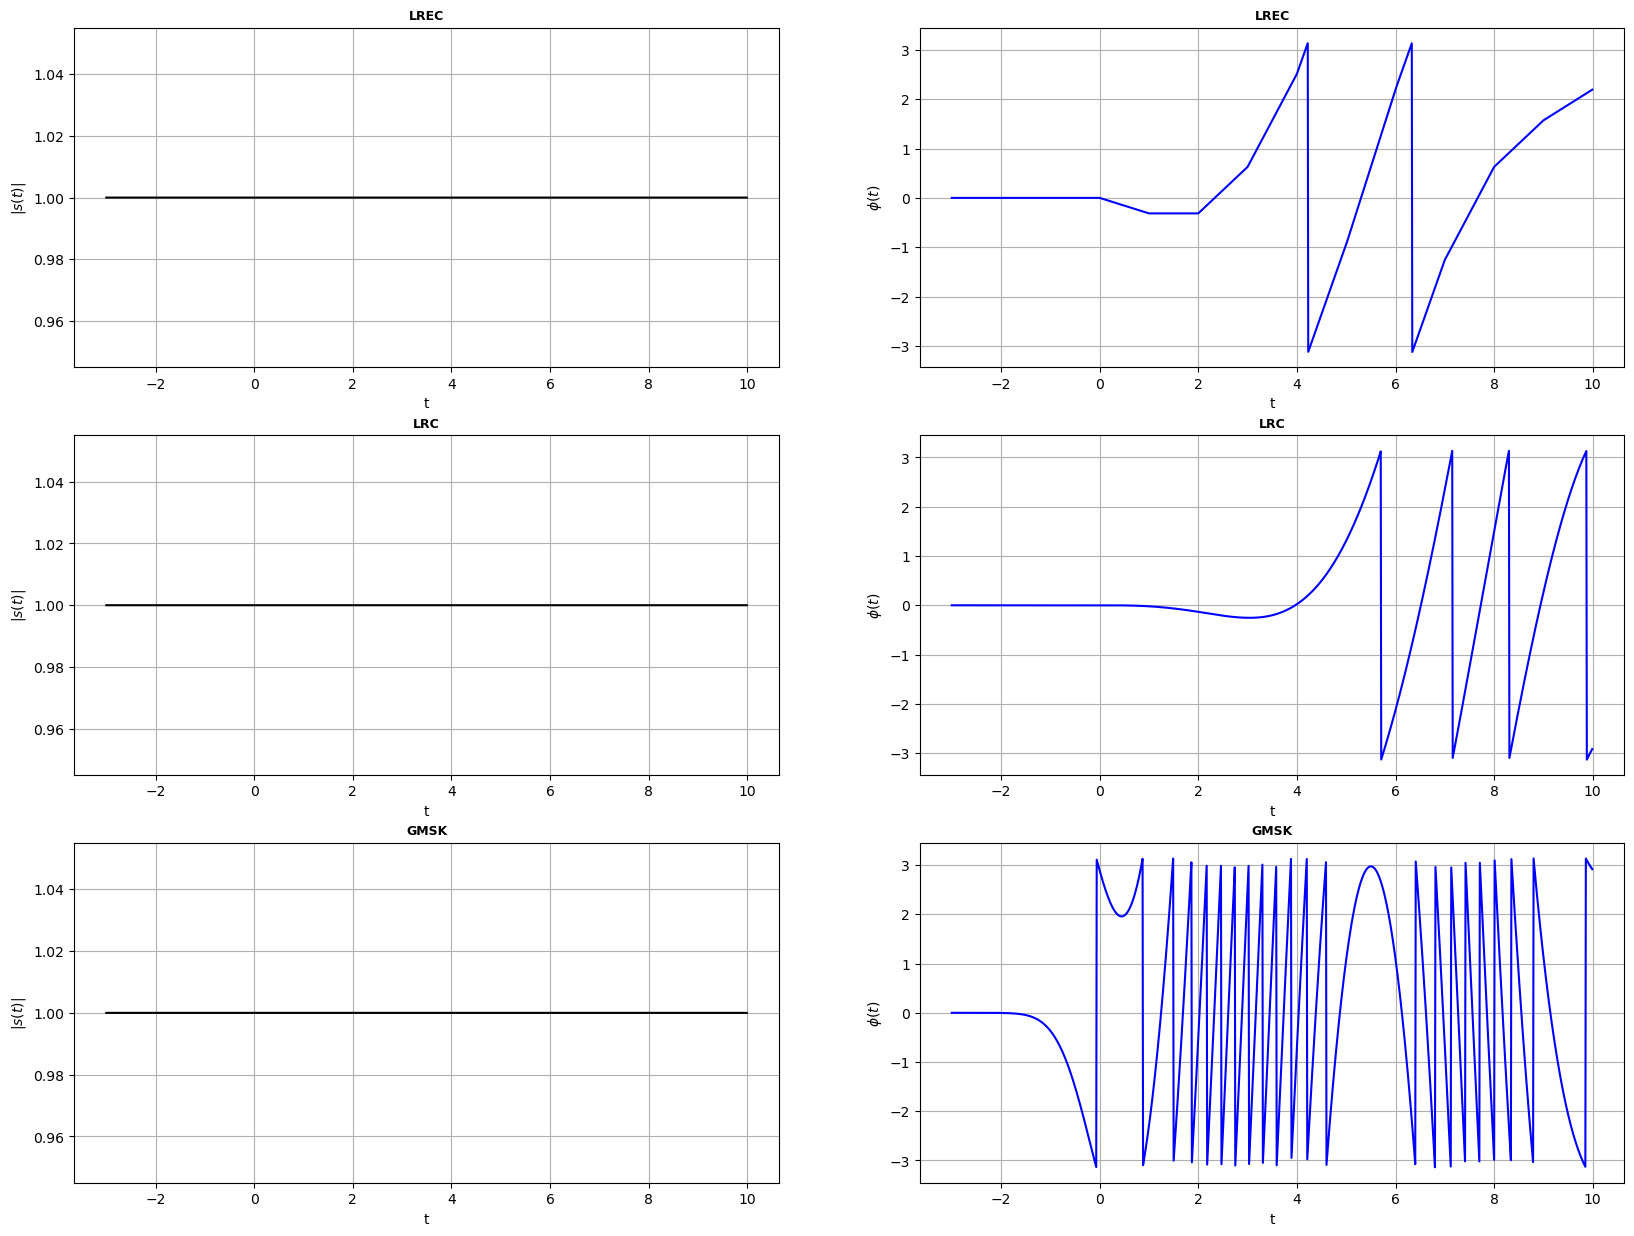

In [20]:
print(f'\n\n{colored(f"Single-h CPM Modulation Results:", "blue", attrs=["bold"])}\n')
print(f'{colored(f"When, ", "blue", attrs=["bold"])}\n')
print(f'{colored(f"T (Symbol Period) = ", "black", attrs=["bold"])}{colored(f"{T}", "black", attrs=["bold"])}')
print(f'{colored(f"L (No. Symbols) = ", "black", attrs=["bold"])}{colored(f"{L}", "black", attrs=["bold"])}')
print(f'{colored(f"h (Modulation Index) = ", "black", attrs=["bold"])}{colored(f"{h}", "black", attrs=["bold"])}')
print(f'{colored(f"M (No. Symbol Alphabets) = ", "black", attrs=["bold"])}{colored(f"{M}", "black", attrs=["bold"])}')


plt.figure(figsize=(20, 15))
color1 = 'black'
color2 = 'blue'

plt.subplot(3, 2, 1)
plt.plot(t_array, s_t_abs_LREC, color=color1), plt.xlabel('t'), plt.ylabel(f'$| s(t) |$'), plt.title(f'{g_mode_LREC}', fontsize=9, fontweight='bold'), plt.grid(True)
plt.subplot(3, 2, 2)
plt.plot(t_array, s_t_phase_rad_LREC, color=color2), plt.xlabel('t'), plt.ylabel(f'$\phi(t)$'), plt.title(f'{g_mode_LREC}', fontsize=9, fontweight='bold'), plt.grid(True)


plt.subplot(3, 2, 3)
plt.plot(t_array, s_t_abs_LRC, color=color1), plt.xlabel('t'), plt.ylabel(f'$| s(t) |$'), plt.title(f'{g_mode_LRC}', fontsize=9, fontweight='bold'), plt.grid(True)
plt.subplot(3, 2, 4)
plt.plot(t_array, s_t_phase_rad_LRC, color=color2), plt.xlabel('t'), plt.ylabel(f'$\phi(t)$'), plt.title(f'{g_mode_LRC}', fontsize=9, fontweight='bold'), plt.grid(True)


plt.subplot(3, 2, 5)
plt.plot(t_array, s_t_abs_GMSK, color=color1), plt.xlabel('t'), plt.ylabel(f'$| s(t) |$'), plt.title(f'{g_mode_GMSK}', fontsize=9, fontweight='bold'), plt.grid(True)
plt.subplot(3, 2, 6)
plt.plot(t_array, s_t_phase_rad_GMSK, color=color2), plt.xlabel('t'), plt.ylabel(f'$\phi(t)$'), plt.title(f'{g_mode_GMSK}', fontsize=9, fontweight='bold'), plt.grid(True)



plt.show()

$\newline$
$\newline$

#### $\color{blue}{\text{Power Spectral Density of CPM Signals:}}$

$\newline$
$\newline$

$\newline$
$\newline$

##### $\color{blue}{\text{By Using Formula:}}$

$\newline$
$\newline$

$\newline$
$\newline$


- [x] $\color{blue}{\text{Step 1:}}$


<center>$\color{}{\phi_{I}(h) \; = \; \frac{1}{M} \; \frac{\sin(M \pi h)}{\sin(\pi h)}}$</center>


- [x] $\color{blue}{\text{Step 2:}}$


<center>$\color{}{\bar{R}_{vl}(\tau) \; = \; \frac{1}{2T} \; \int_{0}^{T} \; \prod\limits_{k = 1-L}^{[\frac{\tau}{T}]} \; \frac{1}{M} \; \frac{\sin(2 \pi \; h \; M \; [q(t \; + \; \tau \; - \; kT) - q(t \; - \; kT)])}{\sin(2 \pi \; h \; [q(t \; + \; \tau \; - \; kT) - q(t \; - \; kT)])} \; dt}$</center>


- [x] $\color{blue}{\text{Step 3:}}$


<center>$\color{}{S_{vl}(f) \; = \; 2 \; [\int_{0}^{LT} \bar{R}_{vl}(\tau) \; \cos(2\pi f \tau) \; d\tau\; + \; \frac{1 - \phi_{I}(h) \cos(2\pi f T)}{1 + \phi_{I}^{2}(h) - 2 \phi_{I}(h) \cos(2\pi f T)} \; \int_{LT}^{(L + 1)T}  \bar{R}_{vl}(\tau) \; \cos(2\pi f \tau) \; d\tau\; - \; \frac{\phi_{I}(h) \sin(2\pi f T)}{1 + \phi_{I}^{2}(h) - 2 \phi_{I}(h) \cos(2\pi f T)} \; \int_{LT}^{(L+1)T} \bar{R}_{vl}(\tau) \; \sin(2\pi f \tau) \; d\tau]}$</center>


$\newline$
$\newline$

In [21]:
def Phi_I_h(M: int, h: float=1) -> float:

    phi = (1/M) * ((np.sin(M * np.pi * h)) / (np.sin(np.pi * h)))

    return phi

In [22]:
def Pi_t_tau(tau: float, T: float, M: int, t: float, L: int, h: float=1, g_mode: str='GMSK') -> float:

    frac = int(np.floor(tau / T))
    if frac < (1 - L):
        out = 0

    else:
        out = 1
        for k in range(1 - L, frac + 1):
    
            t2_array = np.array([t + tau - k*T])
            q2_array = q_Generator(t2_array=t2_array, L=L, T=T, mode=g_mode)
    
            t1_array = np.array([t - k*T])
            q1_array = q_Generator(t2_array=t1_array, L=L, T=T, mode=g_mode)
    
            q = (q2_array - q1_array).item()
            if q == 0:
                result = M

            else:
                result = (np.sin(2 * np.pi * h * M * q)) / (np.sin(2 * np.pi * h * q))
                
            out *= result
    
        out *= (1/M)

    return out

In [23]:
def R_bar_tau(T: float, tau_array: np.array, M: int, L: int, h: float, g_mode: str='GMSK', dt: float=0.1) -> np.array:

    R_tau_list = []
    for tau in tau_array:
        
        t_array = np.arange(0, T, dt)
        pi_list = []
        for t in t_array:
            
            pi = Pi_t_tau(tau=tau, T=T, M=M, t=t, L=L, h=h, g_mode=g_mode)
            pi_list.append(pi)

        pi_array = np.array(pi_list)
        r = dt * pi_array.sum()
        R_tau_list.append(r)

    R_tau_array = (1 / (2*T)) * np.array(R_tau_list)

    return R_tau_array

In [24]:
def Integral_Part(f: float, lower_bound: float, upper_bound: float, function, T: float, M: int, L: int, h: float, g_mode: str='GMSK', dt: float=0.1) -> float:

    tau_array = np.arange(lower_bound, upper_bound, dt)
    R_tau_array = R_bar_tau(T=T, tau_array=tau_array, M=M, L=L, h=h, g_mode=g_mode)
    out = dt * (R_tau_array * function(2 * np.pi * f * tau_array)).sum()

    return out

In [25]:
def S_f(f_array: np.array, M: int, h: float, T: float, L: int, g_mode: str='GMSK') -> np.array:

    S_f_list = []
    eps = 1e-6
    for f in f_array:

        phi_i_h = Phi_I_h(M=M, h=h)
        p1 = Integral_Part(f=f, lower_bound=0, upper_bound=L*T, function=np.cos, T=T, M=M, L=L, h=h, g_mode=g_mode)
        denominator = 1 + (phi_i_h ** 2) - (2 * phi_i_h * np.cos(2 * np.pi * f * T))
        if denominator != 0:
            denominator = denominator
            p2 = (1 - phi_i_h * np.cos(2 * np.pi * f * T)) / (denominator) * Integral_Part(f=f, lower_bound=L*T, upper_bound=(L+1)*T, function=np.cos, T=T, M=M, L=L, h=h, g_mode=g_mode)
            p3 = (phi_i_h * np.sin(2 * np.pi * f * T)) / (denominator) * Integral_Part(f=f, lower_bound=L*T, upper_bound=(L+1)*T, function=np.sin, T=T, M=M, L=L, h=h, g_mode=g_mode)
        else:
            denominator = denominator
            p2 = (1 + phi_i_h * 2 * np.pi * T * np.sin(2 * np.pi * f * T)) / (1 + phi_i_h ** 2 + 2 * phi_i_h * 2 * np.pi * T * np.sin(2 * np.pi * f * T)) * \
            Integral_Part(f=f, lower_bound=L*T, upper_bound=(L+1)*T, function=np.cos, T=T, M=M, L=L, h=h, g_mode=g_mode)
            p3 = (phi_i_h * np.sin(2 * np.pi * f * T)) / (denominator + eps) * Integral_Part(f=f, lower_bound=L*T, upper_bound=(L+1)*T, function=np.sin, T=T, M=M, L=L, h=h, g_mode=g_mode)
            
        S_f_list.append(2 * (p1 + p2 - p3))

    S_f_array = np.array(S_f_list)

    return S_f_array

In [58]:
T = 1
T = float(T)
L = 1
h = 1
M = 4

g_modes_list = ['LREC', 'LRC', 'GMSK']
f_array = np.arange(start=-10*(1/T), stop=10*(1/T), step=0.1)

g_mode_LREC = g_modes_list[0]
s_LREC_array = S_f(f_array=f_array, M=M, h=h, T=T, L=L, g_mode=g_mode_LREC)

g_mode_LRC = g_modes_list[1]
s_LRC_array = S_f(f_array=f_array, M=M, h=h, T=T, L=L, g_mode=g_mode_LRC)

g_mode_GMSK = g_modes_list[2]
s_GMSK_array = S_f(f_array=f_array, M=M, h=h, T=T, L=L, g_mode=g_mode_GMSK)

In [59]:
dir_str = os.getcwd()
path_f_array_str = os.path.join(dir_str, 'f_array.npy')
path_s_LREC_array_str = os.path.join(dir_str, 's_LREC_array.npy')
path_s_LRC_array_str = os.path.join(dir_str, 's_LRC_array.npy')
path_s_GMSK_array_str = os.path.join(dir_str, 's_GMSK_array.npy')

In [60]:
np.save(path_f_array_str, f_array)
np.save(path_s_LREC_array_str, s_LREC_array)
np.save(path_s_LRC_array_str, s_LRC_array)
np.save(path_s_GMSK_array_str, s_GMSK_array)

In [61]:
f_array = np.load(path_f_array_str)
s_LREC_array = np.load(path_s_LREC_array_str)
s_LRC_array = np.load(path_s_LRC_array_str)
s_GMSK_array = np.load(path_s_GMSK_array_str)



PSD of CPM Modulated Signal (by Using Formula):

When, 


T (Symbol Period) = 1.0
L (No. Symbols) = 1
h (Modulation Index) = 1
M (No. Symbol Alphabets) = 4





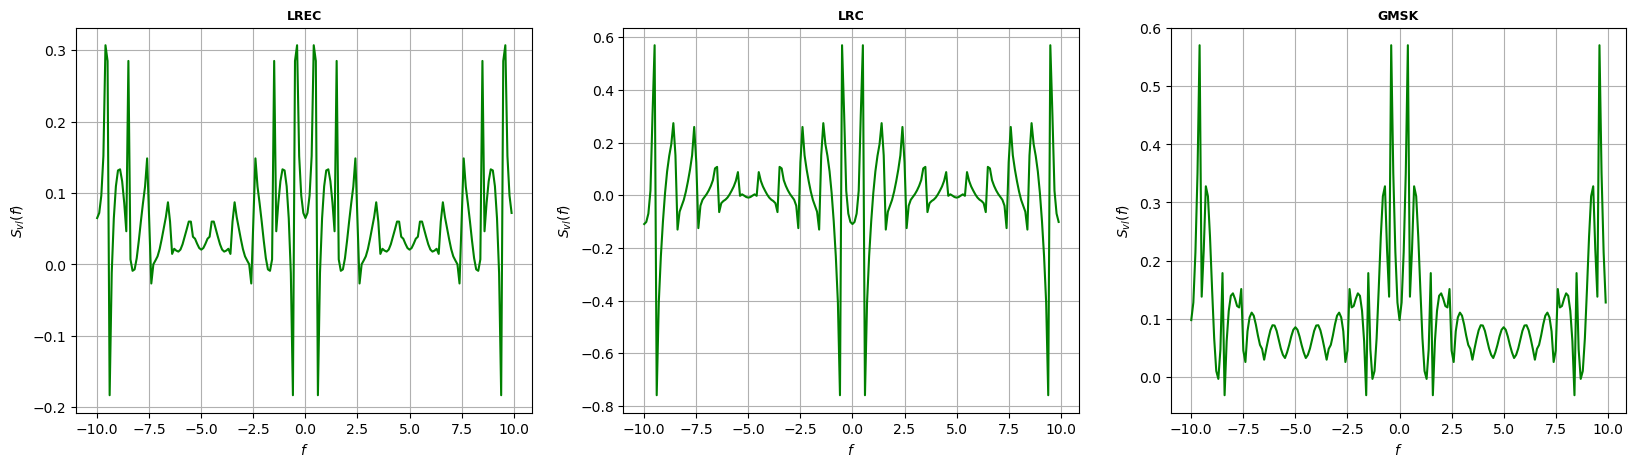

In [81]:
print(f'\n\n{colored(f"PSD of CPM Modulated Signal (by Using Formula):", "blue", attrs=["bold"])}\n')
print(f'{colored(f"When, ", "blue", attrs=["bold"])}\n\n')
print(f'{colored(f"T (Symbol Period) = ", "black", attrs=["bold"])}{colored(f"{T}", "black", attrs=["bold"])}')
print(f'{colored(f"L (No. Symbols) = ", "black", attrs=["bold"])}{colored(f"{L}", "black", attrs=["bold"])}')
print(f'{colored(f"h (Modulation Index) = ", "black", attrs=["bold"])}{colored(f"{h}", "black", attrs=["bold"])}')
print(f'{colored(f"M (No. Symbol Alphabets) = ", "black", attrs=["bold"])}{colored(f"{M}", "black", attrs=["bold"])}\n\n\n')


plt.figure(figsize=(20, 5))
color = 'green'

plt.subplot(1, 3, 1)
plt.plot(f_array, s_LREC_array, color=color), plt.xlabel('$f$'), plt.ylabel('$S_{vl}(f)$'), plt.title(f'{g_mode_LREC}', fontsize=9, fontweight='bold')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(f_array, s_LRC_array, color=color), plt.xlabel('$f$'), plt.ylabel('$S_{vl}(f)$'), plt.title(f'{g_mode_LRC}', fontsize=9, fontweight='bold')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(f_array, s_GMSK_array, color=color), plt.xlabel('$f$'), plt.ylabel('$S_{vl}(f)$'), plt.title(f'{g_mode_GMSK}', fontsize=9, fontweight='bold')
plt.grid(True)

plt.show()

$\newline$
$\newline$

##### $\color{blue}{\text{Exploring the M (No. Symbol Alphabets) Parameter:}}$

$\newline$
$\newline$

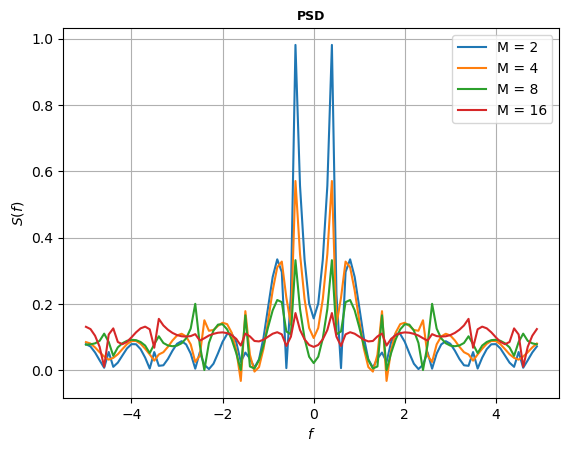

In [28]:
T = 1
T = float(T)
L = 1
h = 1
M_list = [2, 4, 8, 16] 

g_mode = 'GMSK'
f_array = np.arange(start=-5*(1/T), stop=5*(1/T), step=0.1)

for M in M_list:
    
    s_array = S_f(f_array=f_array, M=M, h=h, T=T, L=L, g_mode=g_mode)
    plt.plot(f_array, s_array, label=f'M = {M}')

plt.xlabel('$f$'), plt.ylabel('$S(f)$'), plt.title('PSD', fontsize=9, fontweight='bold')
plt.legend(), plt.grid(True)
plt.show()

$\newline$
$\newline$

##### $\color{blue}{\text{Exploring the L (No. Symbols) Parameter:}}$

$\newline$
$\newline$

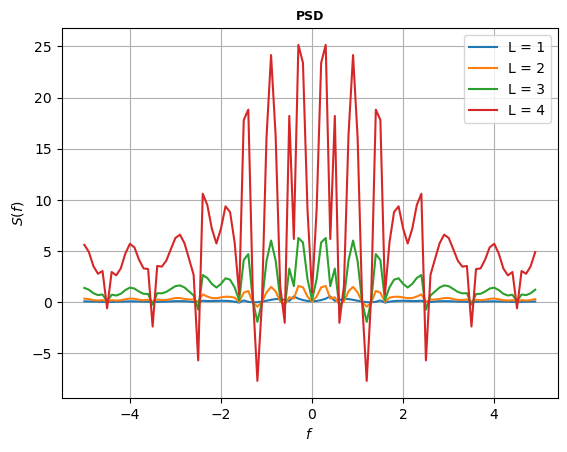

In [29]:
T = 1
T = float(T)
L_list = [1, 2, 3, 4]
h = 1
M = 4

g_mode = 'GMSK'
f_array = np.arange(start=-5*(1/T), stop=5*(1/T), step=0.1)

for L in L_list:
    
    s_array = S_f(f_array=f_array, M=M, h=h, T=T, L=L, g_mode=g_mode)
    plt.plot(f_array, s_array, label=f'L = {L}')

plt.xlabel('$f$'), plt.ylabel('$S(f)$'), plt.title('PSD', fontsize=9, fontweight='bold')
plt.legend(), plt.grid(True)
plt.show()

$\newline$
$\newline$

##### $\color{blue}{\text{Exploring the h (Modulation Index) Parameter:}}$

$\newline$
$\newline$

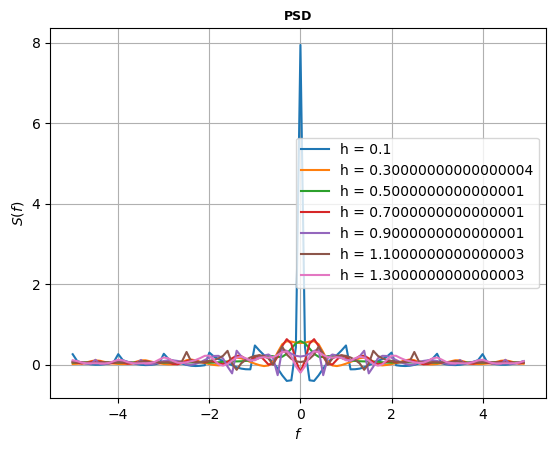

In [30]:
T = 1
T = float(T)
L = 1
h_array = np.arange(0.1, 1.5, 0.2)
M = 4

g_mode = 'GMSK'
f_array = np.arange(start=-5*(1/T), stop=5*(1/T), step=0.1)

for h in h_array:
    
    s_array = S_f(f_array=f_array, M=M, h=h, T=T, L=L, g_mode=g_mode)
    plt.plot(f_array, s_array, label=f'h = {h}')

plt.xlabel('$f$'), plt.ylabel('$S(f)$'), plt.title('PSD', fontsize=9, fontweight='bold')
plt.legend(), plt.grid(True)
plt.show()

$\newline$
$\newline$

##### $\color{blue}{\text{By Using Statistical Experiments (Random Experiments):}}$

$\newline$
$\newline$

$\newline$
$\newline$


- [x] $\color{blue}{\text{Step 1:}}$


<center>$\color{}{R_{vl}(t + \tau; t) \; = \; E[\prod\limits_{k = \infty}^{\infty} exp \; \{ j 2\pi h I_{k} [q(t+\tau-kT) - q(t-kT)]\}]}$</center>


- [x] $\color{blue}{\text{Step 2:}}$


<center>$\color{}{\bar{R}_{vl}(\tau) \; = \; \frac{1}{T} \; \int_{0}^{T} R_{vl}(t + \tau; t) \; dt}$</center>


- [x] $\color{blue}{\text{Step 3:}}$


<center>$\color{}{S_{vl}(f) \; = \; 2 Re [\int_{0}^{\infty} \bar{R}_{vl}(\tau) e^{- j 2\pi f \tau} \; d\tau]}$</center>


$\newline$
$\newline$

In [25]:
def I_k(M: int, num_samples: int) -> np.array:

    I_k_list = []
    for m in range(int(M/2)):

        I = 2*m + 1
        I_k_list += [I, -I]
        
    I_k_array = np.array(I_k_list)

    probs_array = (1/M) * np.ones_like(I_k_array)
    I_k_final = np.random.choice(I_k_array, size=(num_samples, ), p=probs_array)
    
    return I_k_final

In [26]:
def Pi_t_plus_tau(I_k_array: np.array, t: float, tau: float, h: float, T: float, g_mode: str) -> np.array:

    num_samples = len(I_k_array)
    k = -int(num_samples/2)
    out = 1
    for i in range(num_samples):

        t_plus_tau_minus_kT_array = np.array([t + tau]) - (k*T)
        t_minus_kT_array = np.array([t]) - (k*T)
        q1 = q_Generator(t2_array=t_plus_tau_minus_kT_array, L=L, T=T, mode=g_mode)
        q2 = q_Generator(t2_array=t_minus_kT_array, L=L, T=T, mode=g_mode)
        part = (q1 - q2).item()
        result = np.exp(1j*2*np.pi*h*I_k_array[i]*part)
        out *= result
        k += 1

    return out

In [27]:
def R_v_l(h: float, T: float, L: int, M: int, num_experiments: int, num_samples: int, g_mode: str, t_array: np.array, tau: float) -> np.array:

    R_v_l_list = []
    for t in t_array:
        
        E = 0
        for i_ex in range(num_experiments):
    
            I_k_array = I_k(M=M, num_samples=num_samples)
            E += Pi_t_plus_tau(I_k_array=I_k_array, t=t, tau=tau, h=h, T=T, g_mode=g_mode)
    
        E /= num_experiments
        R_v_l_list.append(E)

    R_v_l_array = np.array(R_v_l_list)
    
    return R_v_l_array

In [30]:
def R_v_l_bar_tau(tau_array: np.array,h: float, T: float, L: int, M: int, num_experiments: int, num_samples: int, g_mode: str, dt: float=0.1) -> np.array:

    R_v_l_bar_tau_list = []
    t_array = np.arange(0, T, dt)
    for tau in tau_array:

        R_bar = dt * R_v_l(h=h, T=T, L=L, M=M, num_experiments=num_experiments, num_samples=num_samples, g_mode=g_mode, t_array=t_array, tau=tau).sum()
        R_v_l_bar_tau_list.append(R_bar)

    R_v_l_bar_tau_array = np.array(R_v_l_bar_tau_list)

    return R_v_l_bar_tau_array

In [32]:
def S_v_l_f(f_array: np.array, h: float, T: float, L: int, M: int, num_experiments: int, num_samples: int, g_mode: str, dtau: float=0.1) -> np.array:

    s_list = []
    tau_array = np.arange(0, T, dtau)
    for f in f_array:

        r_v_l_bar_tau = dtau * (R_v_l_bar_tau(tau_array=tau_array, h=h, T=T, L=L, M=M, num_experiments=num_experiments, num_samples=num_samples, g_mode=g_mode) * \
                               np.exp(-1J * 2 * np.pi * f * tau_array)).sum()

        s_list.append(r_v_l_bar_tau)
    s_array = 2 * np.real(np.array(s_list))

    return s_array

In [79]:
T = 1
T = float(T)
h = 1
L = 1
M = 4
g_modes_list = ['LREC', 'LRC', 'GMSK']
num_experiments = 1000
num_samples = 1000

In [ ]:
f_array = np.arange(start=-10*(1/T), stop=10*(1/T), step=0.1)

g_mode_LREC = g_modes_list[0]
s_LREC_array = S_v_l_f(f_array=f_array, h=h, T=T, L=L, M=M, num_experiments=num_experiments, num_samples=num_samples, g_mode=g_mode_LREC)

g_mode_LRC = g_modes_list[1]
s_LRC_array = S_v_l_f(f_array=f_array, h=h, T=T, L=L, M=M, num_experiments=num_experiments, num_samples=num_samples, g_mode=g_mode_LRC)

g_mode_GMSK = g_modes_list[2]
s_GMSK_array = S_v_l_f(f_array=f_array, h=h, T=T, L=L, M=M, num_experiments=num_experiments, num_samples=num_samples, g_mode=g_mode_GMSK)

In [ ]:
dir_str = os.getcwd()
path_f_array_str = os.path.join(dir_str, 'f_array.npy')
path_s_LREC_array_str = os.path.join(dir_str, 's_LREC_array.npy')
path_s_LRC_array_str = os.path.join(dir_str, 's_LRC_array.npy')
path_s_GMSK_array_str = os.path.join(dir_str, 's_GMSK_array.npy')

In [ ]:
np.save(path_f_array_str, f_array)
np.save(path_s_LREC_array_str, s_LREC_array)
np.save(path_s_LRC_array_str, s_LRC_array)
np.save(path_s_GMSK_array_str, s_GMSK_array)

In [80]:
f_array = np.load(path_f_array_str)
s_LREC_array = np.load(path_s_LREC_array_str)
s_LRC_array = np.load(path_s_LRC_array_str)
s_GMSK_array = np.load(path_s_GMSK_array_str)



PSD of CPM Modulated Signal (by Using Random Experiments):

When, 


T (Symbol Period) = 1.0
L (No. Symbols) = 1
h (Modulation Index) = 1
M (No. Symbol Alphabets) = 4





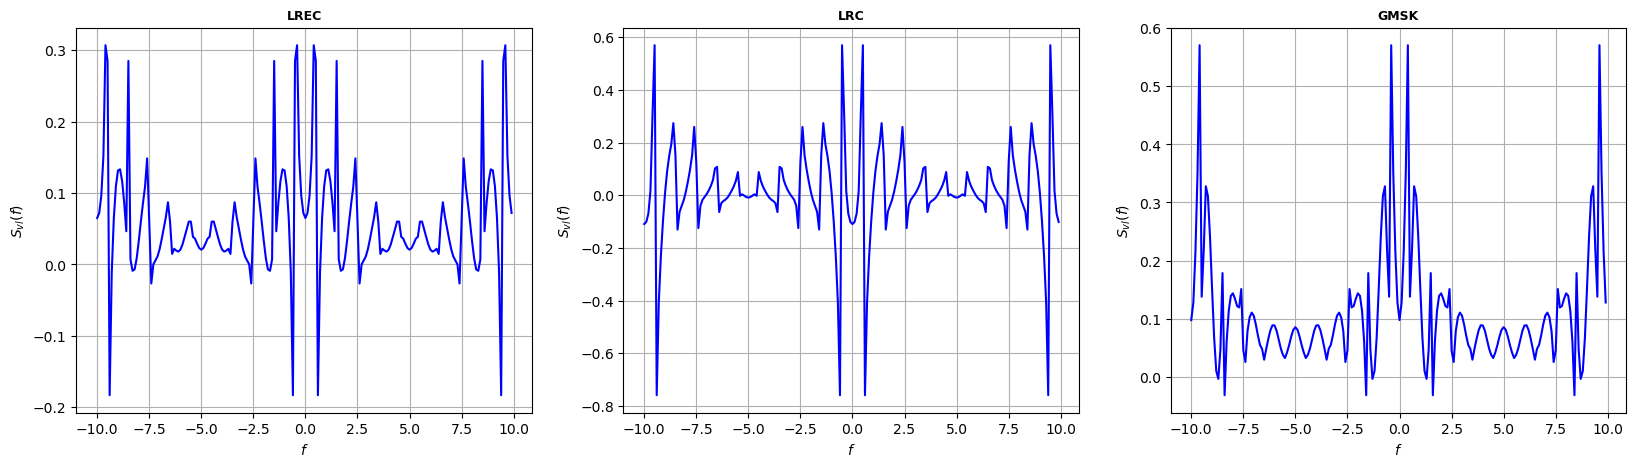

In [82]:
print(f'\n\n{colored(f"PSD of CPM Modulated Signal (by Using Random Experiments):", "blue", attrs=["bold"])}\n')
print(f'{colored(f"When, ", "blue", attrs=["bold"])}\n\n')
print(f'{colored(f"T (Symbol Period) = ", "black", attrs=["bold"])}{colored(f"{T}", "black", attrs=["bold"])}')
print(f'{colored(f"L (No. Symbols) = ", "black", attrs=["bold"])}{colored(f"{L}", "black", attrs=["bold"])}')
print(f'{colored(f"h (Modulation Index) = ", "black", attrs=["bold"])}{colored(f"{h}", "black", attrs=["bold"])}')
print(f'{colored(f"M (No. Symbol Alphabets) = ", "black", attrs=["bold"])}{colored(f"{M}", "black", attrs=["bold"])}\n\n\n')


plt.figure(figsize=(20, 5))
color = 'blue'

plt.subplot(1, 3, 1)
plt.plot(f_array, s_LREC_array, color=color), plt.xlabel('$f$'), plt.ylabel('$S_{vl}(f)$'), plt.title(f'{g_mode_LREC}', fontsize=9, fontweight='bold')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(f_array, s_LRC_array, color=color), plt.xlabel('$f$'), plt.ylabel('$S_{vl}(f)$'), plt.title(f'{g_mode_LRC}', fontsize=9, fontweight='bold')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(f_array, s_GMSK_array, color=color), plt.xlabel('$f$'), plt.ylabel('$S_{vl}(f)$'), plt.title(f'{g_mode_GMSK}', fontsize=9, fontweight='bold')
plt.grid(True)

plt.show()

$\newline$
$\newline$

#### <a name=''>${\large{\bf{}\;\;\color{blue}{\bf{{\text{References:}}}}}}$</a>


$\newline$
$\newline$

$\newline$
$\newline$


- <a name=''>[${\color{red}{\text{MATLAB}}} \underline{\text{ Docs: Continuous-Phase Modulation (CPM)}}$](https://www.mathworks.com/help/comm/ug/continuous-phase-modulation.html?s_tid=srchtitle_site_search_1_continues%2520phase%2520modulation)</a>


$\newline$
$\newline$

$\newline$
$\newline$


- <a name=''>[${\color{blue}{\text{IEEE-1979: }}} \underline{\text{Minimum shift keying: A spectrally efficient modulation }}$](https://ieeexplore.ieee.org/document/1089999)</a>


$\newline$
$\newline$

$\newline$
$\newline$


- <a name=''>${\color{black}{\bf{Book:}}} {\text{ Proakis, John G. Digital Communications. 5th ed. New York: McGraw Hill, 2007.}}$</a>


$\newline$
$\newline$

$\newline$
$\newline$


- <a name=''>${\color{black}{{\bf{Book:}}}} {\text{ Anderson, John B., Tor Aulin, and Carl-Erik Sundberg. Digital Phase Modulation. New York: Plenum Press, 1986.}}$</a>


$\newline$
$\newline$